In [13]:
%load_ext autoreload
%autoreload 2

import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import iqr
"""from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS
from astropy.time import Time
from astropy.timeseries import LombScargle
from astropy.wcs import WCS
from astropy import units as u
from astropy.io import fits
from astropy import constants
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support
"""

#Move up to RAFTS directory
if os.getcwd().endswith('/RAFTS'):
    pass
else:
    os.chdir('../../')
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%load_ext autoreload
%autoreload 2
from utils import make_bb, lamb_eff_md, filt_interp, dcr_offset, inverseTeff
#filt_interp, dpar, dtan, lamb_eff_md, dcr_offset, celest_to_pa
#from utils import inverse_Teff, inverseTeff, inverseWeff, lorentzian, find_min_max_adjacent 
#from utils import variance_weighted_mean, chrDistAng
import globals
globals.initialize()
from config import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Quiescent scale factor = 148.941454322131
4998.002983401353 4728.015370626239 4682.985682844402
12909.09779548645 29796.78518295288
Flux enhancement vs. color enhancement for 14000 K Blackbody, X=1.5, FF = 0.0025
--------------------------
Magnitude enhancement from lines = -0.156 mag
Fractional magnitude enhancement from lines = -0.0021432544174630765

Eff wavelength enhancement from lines = -45.02969 angstroms
Fractional eff wavelength enhancement from lines = -0.009524014676769759

Temp enhancement from lines = 16887.68739 K
Fractional temp enhancement from lines = 1.30820043778513


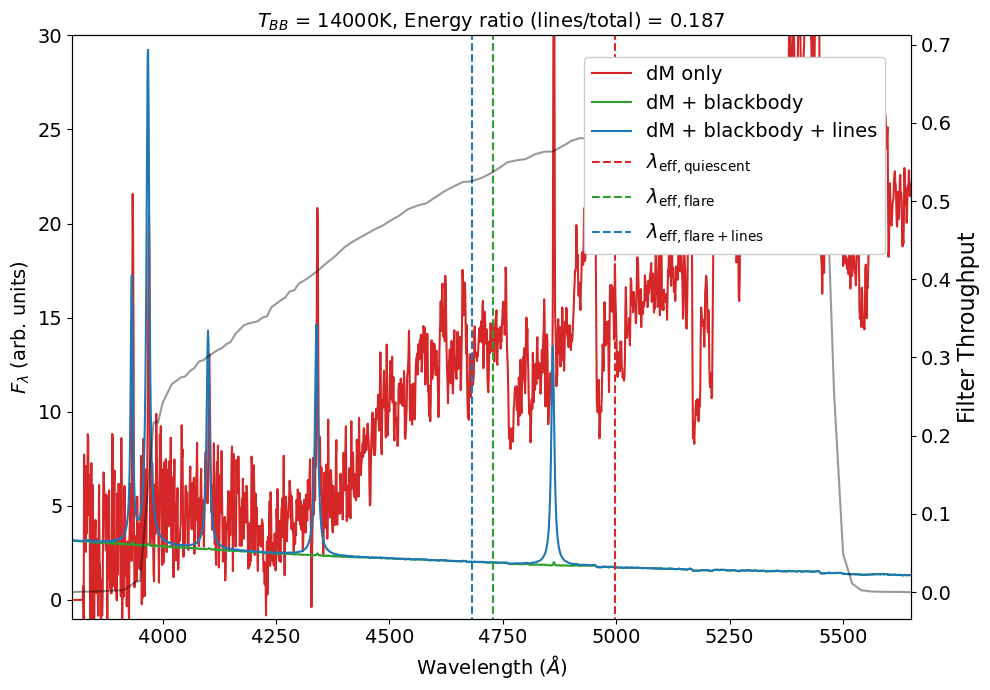

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))

ax2 = ax.twinx()
linefrac = globals.LF
T = 14_000
X = 1.5
FF = globals.FF

flr_weffs = pd.read_csv("Outdata/flr_weffs.csv")
wefflines, weffbb, weffq, delta_g, delta_g_lines, g_mag, g_mag_flare, g_mag_flare_lines = lamb_eff_md(band = 'g', temp=T, ff=FF, lorentz_lines=True, linefrac=linefrac, compplot=True, ax=ax, ax2=ax2, returnFlux=True)

f = filt_interp(band='g')
interpolated_filt = f(WAVELENGTH)

minweff = WAVELENGTH[abs(WAVELENGTH - np.nanmin(flr_weffs)) == abs(WAVELENGTH - np.nanmin(flr_weffs)).min()][0]
maxweff = WAVELENGTH[abs(WAVELENGTH - np.nanmax(flr_weffs)) == abs(WAVELENGTH - np.nanmax(flr_weffs)).min()][0]

binwidth = 2 * (iqr(flr_weffs, nan_policy='omit') / len(flr_weffs)**(1/3))

ax.set_title(r'$T_{BB}$ = ' + '{0:.0f}K'.format(T) + ', Energy ratio (lines/total) = {0:.3f}'.format((1 + (1 / (linefrac[0] + linefrac[1])))**-1), fontsize=14)
ax.set_ylim(-1, 30)
ax.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
ax.xaxis.get_label().set_fontsize(14)
ax.yaxis.get_label().set_fontsize(14)

fig.legend(framealpha=1, bbox_to_anchor=(0.9,0.925), fontsize=14)

dcr = dcr_offset(weffq, airmass = X)
dcr_flare = dcr_offset(weffbb, airmass = X)
dcr_flare_lines = dcr_offset(wefflines, airmass = X)

temp = inverseTeff(weff = weffbb, ff = FF, linefrac = [0.0, 0.0])[0]
templines = inverseTeff(weff = wefflines, ff = FF, linefrac = [0.0,0.0])[0]
print(weffq, weffbb, wefflines)
print(temp, templines)
print('Flux enhancement vs. color enhancement for {0} K Blackbody, X={1}, FF = {2}'.format(int(T), X, FF))
print('--------------------------')
print('Magnitude enhancement from lines = {0:.3f} mag'.format(g_mag_flare_lines - g_mag_flare))
print('Fractional magnitude enhancement from lines = {0}'.format((g_mag_flare_lines - g_mag_flare) / g_mag_flare))
print('')
print('Eff wavelength enhancement from lines = {0:.5f} angstroms'.format(wefflines - weffbb))
print('Fractional eff wavelength enhancement from lines = {0}'.format((wefflines - weffbb) / weffbb))
print('')
print('Temp enhancement from lines = {0:.5f} K'.format(templines - temp))
print('Fractional temp enhancement from lines = {0}'.format((templines - temp) / temp))

fig.tight_layout()

fig.savefig('Figures/lineplot.png', dpi=300, bbox_inches='tight')